## Followed youtube tutorial on how to run MC simulation using yahoo data

Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

### Function to get data from yahoo

In [20]:
def get_data(stocks, start: int, end: int):
    stock_data = pdr.get_data_yahoo(stocks, start, end)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

In [24]:
stocks = ['DIS','META','VOO','TSLA','SPCE','DWAC']
# stocks = [stock + '.AX' for stock in stock_list]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

In [25]:
stocks

['DIS', 'META', 'VOO', 'TSLA', 'SPCE', 'DWAC']

In [26]:
mean_returns, cov_matrix = get_data(stocks, start_date, end_date)

[*********************100%***********************]  6 of 6 completed


In [27]:
print(mean_returns)

DIS    -0.000101
DWAC   -0.003308
META    0.001175
SPCE   -0.002539
TSLA   -0.000280
VOO     0.000064
dtype: float64


use random to get number between 0-1 and np.sum to normalize data and get all equal to one

In [28]:
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

In [30]:
sum(weights)

1.0

MC method

In [32]:
# number of simulations
mc_sims = 100

#timeframe in days
T = 100

meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initial_portfolio = 10000

In [33]:
for m in range(0, mc_sims):
    #MC Loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    daily_returns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T)+1)*initial_portfolio

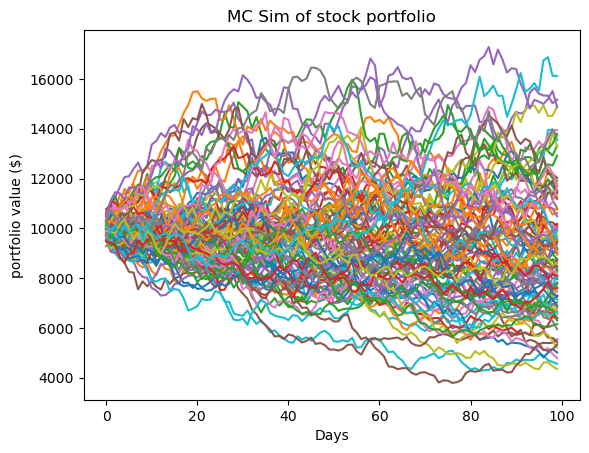

In [34]:
plt.plot(portfolio_sims)
plt.ylabel('portfolio value ($)')
plt.xlabel('Days')
plt.title('MC Sim of stock portfolio')
plt.show()

In [35]:
portfolio_sims

array([[ 9695.61093929,  9787.65661073,  9855.89074579, ...,
        10289.14421831,  9902.07132443, 10096.34079931],
       [ 9389.6184986 ,  9253.69631634,  9755.97449169, ...,
        10736.18689246,  9848.69645302,  9817.60304248],
       [ 9660.97876915,  9112.71081282, 10024.34193857, ...,
        10436.54529849,  9804.63115072, 10104.67652552],
       ...,
       [ 7922.59362441,  6367.39846219, 13097.41789552, ...,
        13536.41372994,  8765.26766472, 16877.59011628],
       [ 8367.89660689,  6438.32956107, 12926.15327197, ...,
        13965.12254111,  8508.86069263, 16128.67011586],
       [ 8608.8662234 ,  6352.15909873, 13326.55486924, ...,
        13731.20199293,  8614.37410298, 16124.57173392]])